# Ceneo Analyzer

## Bilbioteki

In [16]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Lista kodów wszystkich produtów, o których zostały pobrane opinie

In [2]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

156802519
39562616


## Kod produktu, dla którego ma zostać wykonana analiza opinii

In [38]:
product_id = input("Podaj kod produktu w serwisie Ceneo.pl: ")

## Wczytanie do obiektu pandas.DataFrame opinii o wskazanym produkcie

In [39]:
opinions = pd.read_json(f"opinions/{product_id}.json")

In [5]:
opinions

,opinion_id,author,recommendation,rating,content,pros,cons,useful,useless,publish_date,purchase_date
0,18387464,MIODAR,Polecam,5/5,Jest to mój pierwszy tego typu blender. Postan...,"[bezpieczny, bezprzewodowy, duża moc, eleganck...",[],0,0,2024-02-11 04:05:41,2024-02-03 10:38:15
1,18537596,kasiulek,Polecam,5/5,"Rewelacyjny, piękny dizajn, posiadam kolor mie...","[elegancki wygląd, ładny design, szybka wysyłk...",[],0,0,2024-03-30 08:31:50,2024-03-28 07:32:50
2,18359374,Natalia,Polecam,5/5,"Dopiero zaczynam przygodę z Blendy, ale:\nJest...","[bezprzewodowy, elegancki wygląd, ładny design...",[],0,0,2024-02-01 19:23:06,2024-01-28 14:47:11
3,18394372,angelikasitek26,Polecam,5/5,Produkt bardzo solidnie wykonany. Piękny żywy ...,"[bezprzewodowy, elegancki wygląd, ładny design...",[],0,0,2024-02-13 13:50:51,2024-02-11 23:30:15
4,18590279,m...0,Polecam,5/5,"Bardzo fajnie urządzenie, w podróży nie trzeba...","[elegancki wygląd, ładny design, szybka wysyłk...",[],0,0,2024-04-20 06:28:13,2024-04-10 07:08:52
...,...,...,...,...,...,...,...,...,...,...,...
128,18002927,Użytkownik Ceneo,Polecam,5/5,Czekałem na premierę wersji 3 i się nie zawiod...,[],[],0,0,2023-10-15 19:52:06,None
129,18057101,Użytkownik Ceneo,Polecam,5/5,To mój pierwszy blender od Blendy go i jest to...,"[bezprzewodowy, elegancki wygląd, można pić z ...",[],0,0,2023-11-01 20:12:48,None
130,18022873,Dmitrij,Polecam,5/5,blender jest świetny. Szukałem przenośnego. Do...,"[bezprzewodowy, elegancki wygląd, można pić z ...",[],0,0,2023-10-20 17:53:20,None
131,17903116,Użytkownik Ceneo,Polecam,5/5,Jest super😀,[],[],0,0,2023-09-14 21:25:19,None


## Przekształcanie danych

In [40]:
opinions.rating = opinions.rating.apply(lambda rate: rate.split("/")[0].replace(",",".")).astype(float)

## Podstawowe statystyki

In [7]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_rating = opinions.rating.mean()

## Histogram częstości poszczególnych ocen w opiniach o produkcie

[Text(0, 0, ''),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, ''),
 Text(0, 0, '5'),
 Text(0, 0, '3'),
 Text(0, 0, '19'),
 Text(0, 0, '19'),
 Text(0, 0, '79')]

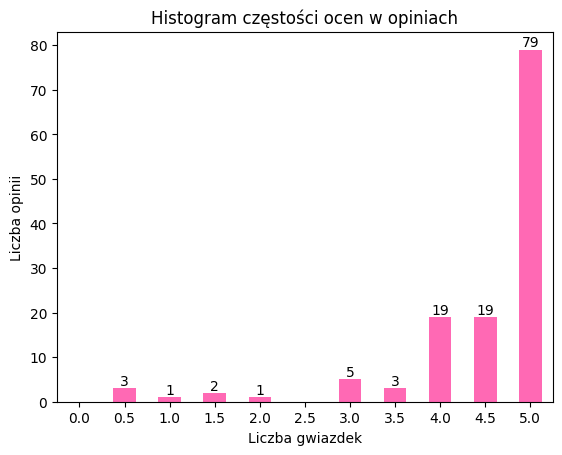

In [41]:
rating_distribution = opinions.rating.value_counts().reindex(np.arange(0,5.5,0.5), fill_value = 0)
fig, ax = plt.subplots()
rating_distribution.plot.bar(color = "hotpink")
plt.xticks(rotation = 0)
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.title("Histogram częstości ocen w opiniach")
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda x: int(x) if x > 0 else '')

## Udział poszczególnych rekomendacji w opiniach o produkcie

Text(0.5, 1.0, 'Udział rekomendacji w opiniach')

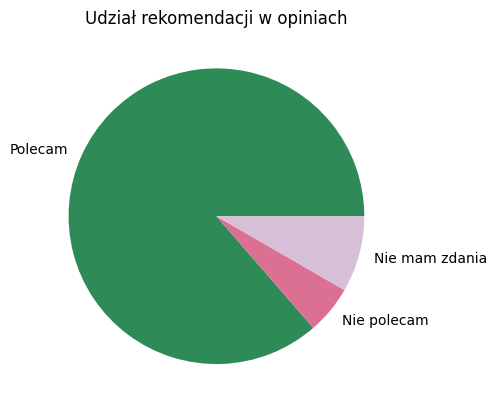

In [44]:
recommendation_distribution = opinions.recommendation.value_counts(dropna=False).reindex(["Polecam", "Nie polecam", None])
recommendation_distribution.plot.pie(
    label="",
    colors = ["seagreen", "palevioletred", "thistle"],
    labels = ["Polecam", "Nie polecam", "Nie mam zdania"]
)
plt.title("Udział rekomendacji w opiniach")